In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'casp_da'

In [31]:
list(da.seqs).index('NLQLRLG')
list(da.seqs).index('EFWNLDK')

1

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
UniProt ID: Q48658


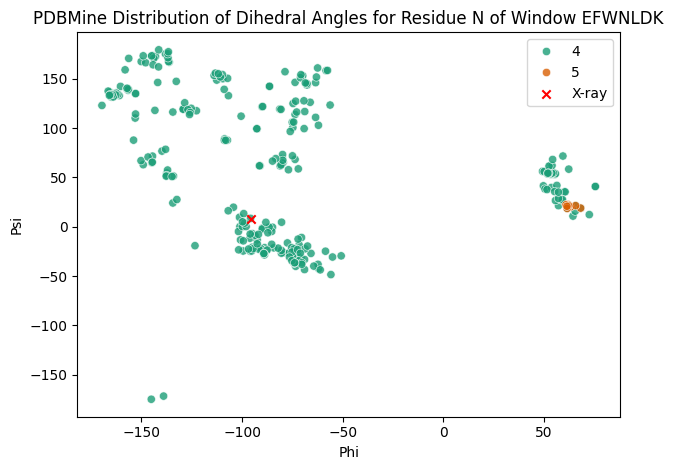

Max: P(-82.729805, -20.557103)=0.000062


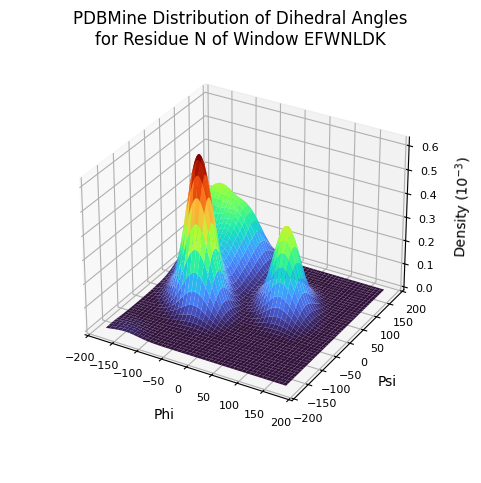

In [96]:
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'
proteins = [
    'T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
    'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]
proteins = [
	'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
	'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]
# da = DihedralAdherence(proteins[0], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
proteins = [
  'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]
# da.load_results()
# da.compute_das()
# da.test_pdbmine_conn()
# da.query_pdbmine()
da.load_results_da()
da.filter_nas(quantile=0.8)
da.plot_one_dist_scatter(da.seqs[1])
da.plot_one_dist_3d(da.seqs[1])
# rsquared, pearsonr = da.test_correlation()
# da.filter_nas(quantile=0.7)
# results = pd.concat([q.results for q in da.queries])
# print(results.groupby('phi').size().sort_index(ascending=False).head())
# results.describe().loc[['min','max'], ['phi','psi']]
# print(da.xray_phi_psi.describe().loc[['min','max'], ['phi','psi']])
# da.phi_psi_predictions.describe().loc[['min','max'], ['phi','psi']]
# da.plot_da_for_seq()
# da.plot_dist_kde(percentile=0.50)
# both = da.plot_res_vs_da()
# da.plot_da_vs_gdt()
# da.plot_da_vs_gdt_simple()
# print(da.grouped_preds.da_na.describe())
# print(da.grouped_preds[da.grouped_preds.da_na > da.grouped_preds.da_na.quantile(0.9)].shape)
# da.plot_res_vs_da(da.protein_ids[0], highlight_res=((159,163),(187,191),(373,377)), legend_loc='upper left', text_loc='left')
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).mean())
# print((~np.isnan(da.grouped_preds_da.values)).sum(axis=1).std())
# da.plot_heatmap(fillna=False, fillna_row=False)
# print(da.grouped_preds[da.grouped_preds.protein_id==da.get_id('337_5')].RMS_CA)
# rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.protein_ids[0], split=[(48,48),(49,49),(76, 76),(106,106),(107,107)])
# rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.protein_ids[0], split=[(161,161), (189,189), (362,375)])

In [144]:
from lib.utils import get_phi_psi_dist
seq = da.seqs[3]
phi_psi_dist = get_phi_psi_dist(da.queries, seq)[0]
phi_psi_dist = phi_psi_dist.loc[~phi_psi_dist[['phi', 'psi']].isna().any(axis=1)]
xray = da.xray_phi_psi.loc[da.xray_phi_psi.seq_ctxt == seq, ['phi','psi']].values[0]

Max: P(-76.713092, 120.835655)=1.000000


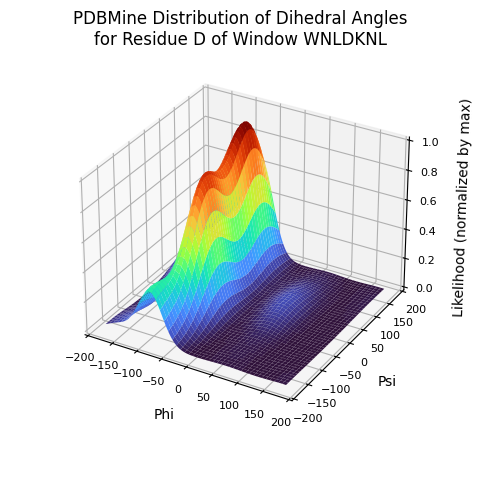

In [145]:
from matplotlib.ticker import FuncFormatter

x = phi_psi_dist[['phi','psi']].values.T
weights = phi_psi_dist['weight'].values
kde = gaussian_kde(x, weights=weights, bw_method=0.5)

x_grid, y_grid = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-180, 180, 360))
grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z = kde(grid).reshape(x_grid.shape)
zmax = z.max()
z = z / zmax
print(f'Max: P({grid[0,z.argmax()]:02f}, {grid[1,z.argmax()]:02f})={z.max():02f}')

cm = plt.get_cmap('turbo')
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z, cmap=cm)
# ax.zaxis.set_major_formatter(FuncFormatter(lambda x,pos:f'{x * 10e3:.1f}'))
# ax.zaxis.set_major_formatter(FuncFormatter(lambda x,pos:f'{x * 1e3:.1f}'))

ax.set_title(f'PDBMine Distribution of Dihedral Angles\nfor Residue {seq[da.winsize_ctxt//2]} of Window {seq}', y=0.99, fontsize=12)
ax.set_xlabel('Phi', fontsize=10, labelpad=10)
ax.set_ylabel('Psi', fontsize=10, labelpad=10)
ax.set_zlabel(r'Likelihood (normalized by max)', fontsize=10, labelpad=10)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.zaxis.set_tick_params(labelsize=8)
ax.set_box_aspect(aspect=None, zoom=0.8)
# ax.dist = 5
plt.tight_layout()
plt.show()

[-81.18190255 -18.64037123]
[-92.07641886 124.54636291]
[ -96.1371517  -170.41981424]
[75.45212766 40.70106383]
[-66.32551808 141.75509818]


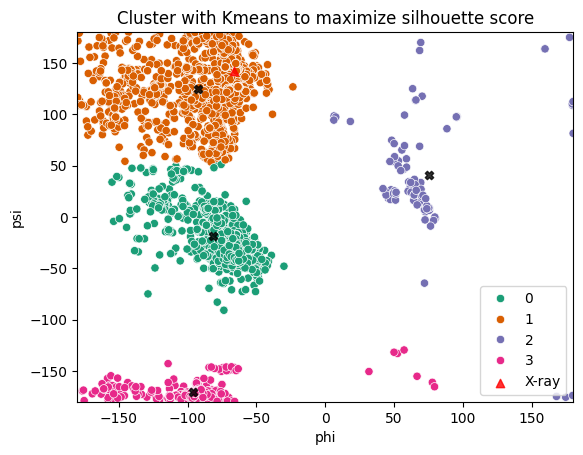

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_sil_avg = -1
for k in range(2, min(phi_psi_dist.shape[0], 7)):
    kmeans = KMeans(n_clusters=k, n_init=10) # TODO experiment with n_init
    labels = kmeans.fit_predict(phi_psi_dist[['phi', 'psi']])
    sil_avg = silhouette_score(phi_psi_dist[['phi', 'psi']], labels)
    if sil_avg > max_sil_avg:
        max_sil_avg = sil_avg
        phi_psi_dist['cluster'] = labels
sns.scatterplot(phi_psi_dist, x='phi', y='psi', hue='cluster', palette='Dark2')
for cluster in phi_psi_dist.cluster.unique():
    center = phi_psi_dist[phi_psi_dist.cluster==cluster][['phi', 'psi']].mean().values
    plt.scatter(center[0], center[1], color='black', marker='X', alpha=0.8)
    print(center)
plt.scatter(xray[0], xray[1], color='red', marker='^', alpha=0.8, label='X-ray')
print(xray)
# phi_psi_dist.plot(kind='scatter', x='phi', y='psi', c='cluster', cmap='viridis', s=10)
plt.title('Cluster with Kmeans to maximize silhouette score')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.legend()
plt.show()

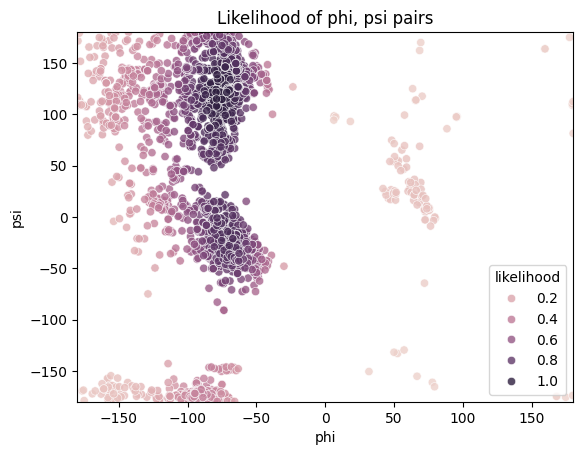

In [147]:
from scipy.stats import gaussian_kde

phi_psi_dist['likelihood'] = kde(phi_psi_dist[['phi','psi']].values.T) / zmax
sns.scatterplot(phi_psi_dist, x='phi', y='psi', hue='likelihood', alpha=0.8, legend='brief')
plt.title('Likelihood of phi, psi pairs')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.show()

[-76.1030888  -21.70862291]
[-81.24820416 124.05056711]


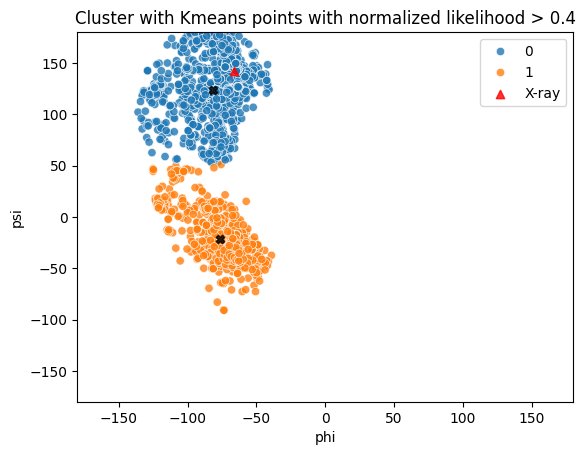

In [148]:
cutoff = phi_psi_dist[phi_psi_dist.likelihood > 0.4]

max_sil_avg = -1
for k in range(2, min(cutoff.shape[0], 7)):
    kmeans = KMeans(n_clusters=k, n_init=10) # TODO experiment with n_init
    labels = kmeans.fit_predict(cutoff[['phi', 'psi']])
    sil_avg = silhouette_score(cutoff[['phi', 'psi']], labels)
    if sil_avg > max_sil_avg:
        max_sil_avg = sil_avg
        cutoff.loc[:, 'cluster'] = labels

sns.scatterplot(cutoff, x='phi', y='psi', hue='cluster', alpha=0.8, legend='brief')
for cluster in cutoff.cluster.unique():
    center = cutoff[cutoff.cluster==cluster][['phi', 'psi']].mean().values
    plt.scatter(center[0], center[1], color='black', marker='X', alpha=0.8)
    print(center)
plt.scatter(xray[0], xray[1], color='red', marker='^', alpha=0.8, label='X-ray')
plt.title('Cluster with Kmeans points with normalized likelihood > 0.4')
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.legend()
plt.show()

In [56]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(phi_psi_dist[['phi', 'psi']].values)

32.22385554740044

/tmp/ipykernel_3576709/2310827317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutoff['cluster'] = ms.labels_


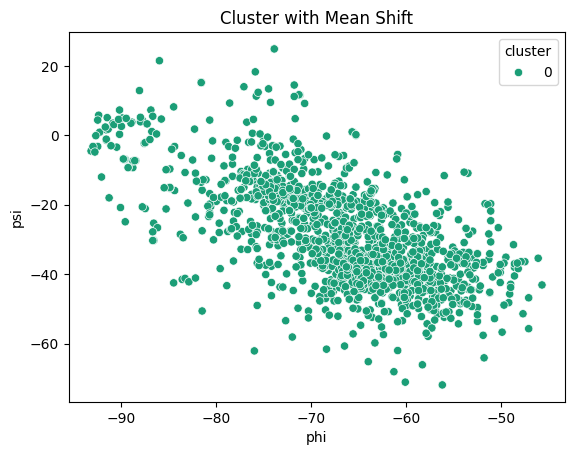

In [129]:
# Find clusters
from sklearn.cluster import MeanShift
# bandwidth = 32
bandwidth = None
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(phi_psi_dist[['phi','psi']])
phi_psi_dist['cluster'] = ms.labels_
sns.scatterplot(phi_psi_dist, x='phi', y='psi', hue='cluster', palette='Dark2')
# phi_psi_dist.plot(kind='scatter', x='phi', y='psi', c='cluster', cmap='viridis', s=10)
plt.title('Cluster with Mean Shift')
plt.show()

In [49]:
proteins = [
  'T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]
proteins = [
  'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]
for protein in proteins:
    try:
        da = DihedralAdherence(protein, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                               mode='ml', weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda')
        # da.query_pdbmine()
        # da.compute_structures(replace=True)
        da.load_results()
        da.compute_das(replace=True)
    except Exception as e:
        print(f"{protein} - Error: {e}")

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
UniProt ID: Q48658
0/372: KEFWNLD
	Win 4: FWNL - 388 samples
	Win 5: EFWNL - 25 samples
	Win 6: EFWNLD - 0 samples
	Win 7: KEFWNLD - 0 samples
	Weighted n samples: 538.0
	478 predictions
	Xray DA: [5.97061805] Pred DA: 43.96713513683796
1/372: EFWNLDK
	Win 4: WNLD - 291 samples
	Win 5: FWNLD - 8 samples
	Win 6: FWNLDK - 0 samples
	Win 7: EFWNLDK - 0 samples
	Weighted n samples: 339.0
	478 predictions
	Xray DA: [6.82231536] Pred DA: 51.58035031899081
2/372: FWNLDKN
	Win 4: NLDK - 2550 samples
	Win 5: WNLDK - 42 samples
	Win 6: WNLDKN - 0 samples
	Win 7: FWNLDKN - 0 samples
	Weighted n samples: 2802.0
	478 predictions
	Xray DA: [12.62324305] Pred DA: 54.897564303906755
3/372: WNLDKNL
	Win 4: LDKN - 2427 samples
	Win 5: NLDKN - 95 samples
	Win 6: NLDKNL - 8 samples
	Win 7: WNLDKNL - 0 samples
	Weighted n samples: 3053.0
	478 predictions
	Xray DA: [3.48757564] Pred DA: 56.12489581327

In [ ]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025'],
    # ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'],
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds, axlims=((0,60), (0,80)))